# Ejercicio guiado de introducción a Data Science

1. Bajar el set de datos de la pagina: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/data#
2. Bajar el set llamado: uber-raw-data-aug14.csv
3. Guardarlo en una ubicación conocida.

In [2]:
import pandas as pd
import pylab as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

In [3]:
DATA_FILE = 'Data/uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [4]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    829275 non-null object
Lat          829275 non-null float64
Lon          829275 non-null float64
Base         829275 non-null object
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


- Estas estadísticas son importantes para saber que tipo de información hay en cada campo.
- Por ejemplo, aqui vemos que la latitud y la longitud son números tipo float64 (con punto decimal y muy grandes)
- En caso de no tener acceso a los dueños de la información, esta es una muy buena forma de explorar los datos.
- El tamaño total en memoria también es muy importante, ya que todo esto vive en la memoria RAM. Esto nos indica que para usar este conjunto de datos, requerimos al menos 25 M en Ram (seguramete mas)

## Data Augmentation

Un proceso muy importante en Data Science es el de aumentar nuestros datos de tal forma que podamos obtener mas información de estos.

Hay dos formas de hacer data augmentation:

- Explotación de Datos disponiles
- Introducción de fuentes externas. (Twitter, Facebook, etc)

In [5]:
# Primero convertimos el campo en un formato valido de fecha.
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data.info()
uber_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
Date/Time    829275 non-null datetime64[ns]
Lat          829275 non-null float64
Lon          829275 non-null float64
Base         829275 non-null object
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 25.3+ MB


,Date/Time,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


Ahora la fecha esta en un formato de "Fecha" computacionalmente hablando, podemos operar sobre ese campo como si fueran fechas.

In [6]:
uber_data.iloc[0]

Date/Time    2014-08-01 00:03:00
Lat                      40.7366
Lon                     -73.9906
Base                      B02512
Name: 0, dtype: object

In [7]:
uber_data.iloc[0].Date/Time

AttributeError: 'Series' object has no attribute 'Date'

In [8]:
uber_data.iloc[0]['Date/Time']

Timestamp('2014-08-01 00:03:00')

El nombre de columna 'Date/Time' fue una muy mala decisión por parte del creador de la tabla, hay que limpiar las columnas y tratar de usar caracteres que no sean conflictios (En DBA lo llaman **Normalización**)

In [9]:
uber_data = uber_data.rename(columns={'Date/Time': 'Date'}) #renombramos la columna a algo mas razonable
uber_data.head()

,Date,Lat,Lon,Base
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512


In [10]:
uber_data['DayOfWeekNum'] = uber_data['Date'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date'].dt.day
uber_data['HourOfDay'] = uber_data['Date'].dt.hour
uber_data.head()

,Date,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,Friday,1,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,Friday,1,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,Friday,1,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,Friday,1,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,Friday,1,0


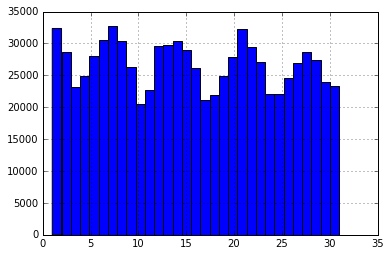

In [11]:
uber_data['MonthDayNum'].hist(bins = 31)

In [12]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')

In [13]:
uber_weekdays.head()

,,Base
DayOfWeekNum,DayOfWeek,
0,Monday,91633
1,Tuesday,107124
2,Wednesday,115256
3,Thursday,124117
4,Friday,148674


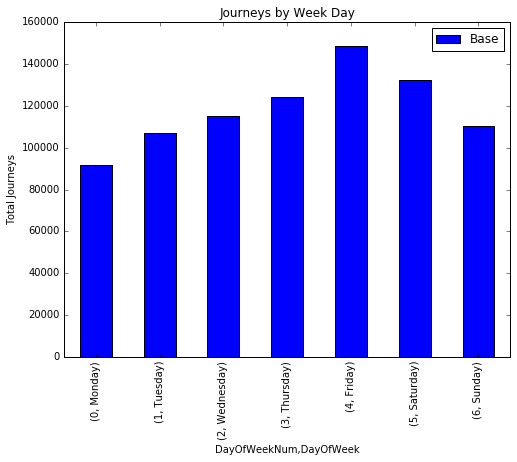

In [14]:
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');

In [15]:
uber_monthdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_monthdays.head(31)

,Base
MonthDayNum,
1,32353
2,28678
3,23146
4,24952
5,28094
6,30495
7,32759
8,30411
9,26286


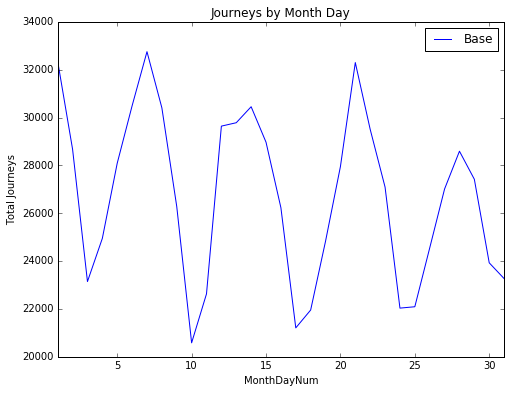

In [16]:
uber_monthdays.plot(figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Day');

In [17]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')

In [18]:
uber_hour.head(15)

,Base
HourOfDay,
0,21451
1,14471
2,10105
3,10376
4,11774
5,16525
6,24907
7,34064
8,34566


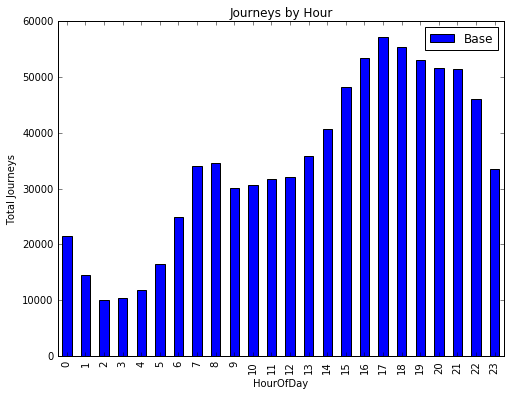

In [19]:
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');
plt.savefig('Uber_Hour.png')

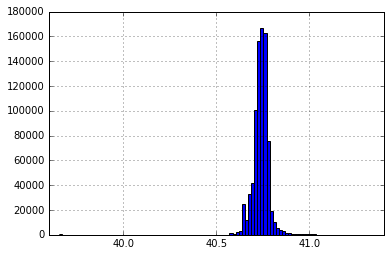

In [20]:
uber_data['Lat'].hist(bins = 100)

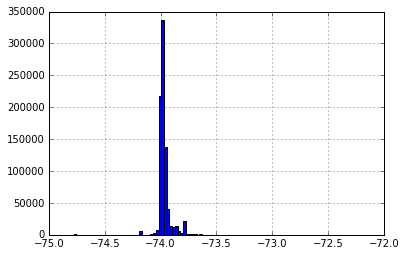

In [21]:
uber_data['Lon'].hist(bins = 100)

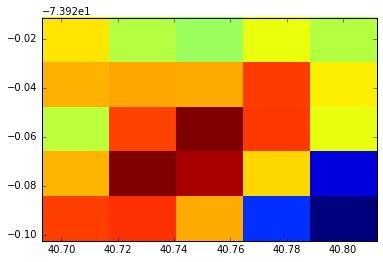

In [28]:
from matplotlib.colors import LogNorm
uber_data = uber_data[(uber_data.Lon >= -74.0225720331) & (uber_data.Lon <= -73.9312481805)]
uber_data = uber_data[(uber_data.Lat >= 40.6929490839) & (uber_data.Lat <= 40.8119355135)]
values = plt.hist2d(uber_data['Lat'].values, uber_data['Lon'].values, bins=5, norm=LogNorm())


In [34]:
values[0]

array([[  3.59520000e+04,   1.42970000e+04,   5.15900000e+03,
          1.49190000e+04,   9.81900000e+03],
       [  4.03100000e+04,   1.17063000e+05,   3.54950000e+04,
          1.59530000e+04,   4.72400000e+03],
       [  1.54700000e+04,   8.77380000e+04,   1.16597000e+05,
          1.54890000e+04,   3.73600000e+03],
       [  2.57000000e+02,   1.10870000e+04,   3.81750000e+04,
          3.71840000e+04,   7.71300000e+03],
       [  7.00000000e+01,   1.29000000e+02,   7.47200000e+03,
          8.90300000e+03,   4.81900000e+03]])

In [35]:
values[0].shape

(5, 5)

In [36]:
maxlat, maxlon = np.unravel_index(values[0].argmax(), values[0].shape)
maxlat, maxlon

(1, 1)

In [37]:
values[1][maxlat], values[2][maxlon]

(40.716780000000007, -74.004259999999988)

In [ ]:
values[2][131]